In [1]:
import pandas as pd
!pip install matplotlib
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [65]:
Hospitalization_Discharge=pd.read_excel("Cardiac_Outcomes.xlsx",sheet_name=0)
CardiacComplications=pd.read_excel("Cardiac_Outcomes.xlsx",sheet_name=1)
Responsivenes=pd.read_excel("Cardiac_Outcomes.xlsx",sheet_name=2)
PatientHistory=pd.read_excel("Cardiac_Outcomes.xlsx",sheet_name=3)
Labs=pd.read_excel("Cardiac_Outcomes.xlsx",sheet_name=4)
Demography=pd.read_excel("Cardiac_Outcomes.xlsx",sheet_name=5)
Patient_Prescriptions=pd.read_excel("Cardiac_Outcomes.xlsx",sheet_name=6)

#### 17) Using arrays and loops find the number of patients who were Admitted in the month of November

In [66]:
count=0
for date in Hospitalization_Discharge['Admission_date']:
    #checking for tthe month
  if date.month == 11:
    count+=1
print("Number Of Patients Admitted in November:",count)

Number Of Patients Admitted in November: 195


#### 18) Create a heatmap on any columns of your choice including at least 1 lab value

<Axes: ylabel='ageCat'>

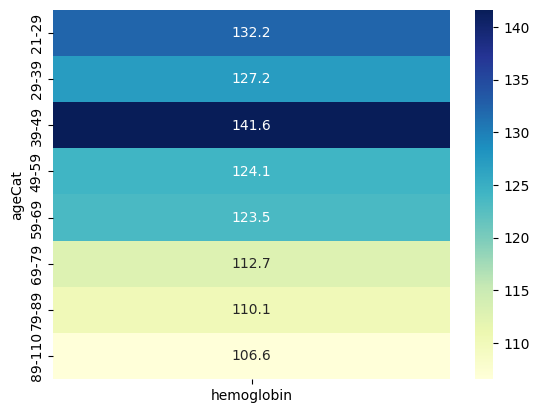

In [67]:

# importing seaborn library
import seaborn as sns
#import matplotlib.pyplot as plt
#%matplotlib inline 
import numpy as np

# merging labs and demography datasets
df7=Labs.merge(Demography,on='inpatient_number')

# creating a new dataframe df7 with only he columns gender, ageCat, hemoglobin
df7=df7.loc[:,['gender','ageCat','hemoglobin']]

#calculating the average hemoglobin values for each age group
hem_agecat= df7.groupby('ageCat').mean('hemoglobin')

# generating heat map for these age categories and their avg Hemoglobin values
sns.heatmap(hem_agecat, annot=True, cmap='YlGnBu', fmt='.1f')

#### 19) Create a bar chart by making list on Avg BMI and occupation column (with no duplicates) & make the hatchs onto the bar by using set_hatch() method

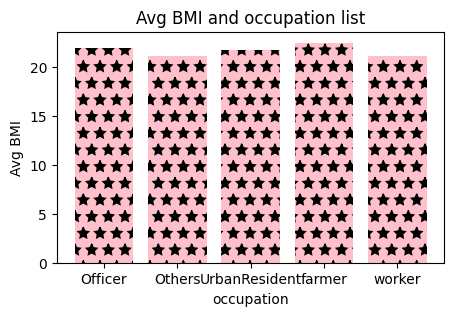

In [68]:
avg_bmi=Demography.groupby('occupation')['BMI'].mean()
plt.figure(figsize=(5,3))
barchart=plt.bar(avg_bmi.index,avg_bmi.values,color='pink')
# Adding hatch onto the bar
for x in barchart:
    x.set_hatch('*')
plt.title("Avg BMI and occupation list")
# labeling x-axis and y-axis
plt.xlabel("occupation")
plt.ylabel("Avg BMI")
plt.show()

#### 20)  You are given three integers x,y,z representing the dimensions of a cuboid along with an integer n .
#### Print a list of all possible coordinates given by(i,j,k) on a 3D grid where the sum of i,j,k is not equal to n.
#### x=1, y=1, z=2, n=3

In [69]:
x, y, z, n = 1, 1, 2, 3
print([(i, j, k) for i in range(x + 1) for j in range(y + 1)
  for k in range(z + 1) if i + j + k != n])

[(0, 0, 0), (0, 0, 1), (0, 0, 2), (0, 1, 0), (0, 1, 1), (1, 0, 0), (1, 0, 1), (1, 1, 0), (1, 1, 2)]


#### 21) Given the names and grades for each student in a class of students, store them in a nested list and print the name(s) of any student(s) having the second lowest grade.
#### python_students = [['Harry', 37.21], ['Berry', 37.21], ['Tina', 37.2], ['Akriti', 41], ['Harsh', 39]]

In [70]:
def Sort(python_students):
    l = len(python_students)
    for i in range(0, l):
        for j in range(0, l-i-1):
            if (python_students[j][1] > python_students[j + 1][1]):
                temp = python_students[j]
                python_students[j] = python_students[j + 1]
                python_students[j + 1] = temp
    return python_students

# Input list
python_students = [['Harry', 37.21], ['Berry', 37.21], ['Tina', 37.2], ['Akriti', 41], ['Harsh', 39]]
sort_students=Sort(python_students)
# Printing the sorted list 
print(sort_students)
second_lowest_grade=sort_students[1][1]
print("Second Lowest Grade:",second_lowest_grade)
second_lowest_students = [student[0] for student in sort_students if student[1] == second_lowest_grade]
for name in second_lowest_students:
    print(name)

[['Tina', 37.2], ['Harry', 37.21], ['Berry', 37.21], ['Harsh', 39], ['Akriti', 41]]
Second Lowest Grade: 37.21
Harry
Berry


#### 22) Which patient was on the most number of prescribed drugs? What was his age and outcome?

In [71]:
max_count_value = Patient_Prescriptions['inpatient_number'].value_counts().idxmax()
print("Patient with maximum prescriptions is: ",max_count_value)
# Find age and outcome for the patient with the maximum count value
age = None
outcome = None

# Checking df5 for age range
if Demography[Demography['inpatient_number'] == max_count_value].shape[0] > 0:
    age =Demography[Demography['inpatient_number'] == max_count_value]['ageCat'].iloc[0]
# Checking df for outcome
if Hospitalization_Discharge[Hospitalization_Discharge['inpatient_number'] == max_count_value].shape[0] > 0:
    outcome = Hospitalization_Discharge[Hospitalization_Discharge['inpatient_number'] == max_count_value]['outcome_during_hospitalization'].iloc[0]

print("Age Range:", age)
print("Outcome:", outcome)


Patient with maximum prescriptions is:  777204
Age Range: 79-89
Outcome: Alive


#### 23) How many patients were prescribed Digoxin?

In [72]:
Patient_Prescriptions.head(2)
count=0
# checking for the Digoxin drug
for drug in Patient_Prescriptions['Drug_name']:
    if drug=="Digoxin tablet":
     count+=1
print("Number of Patients Prescribed Digoxin are :",count)

Number of Patients Prescribed Digoxin are : 999


#### 24) What columns indicate a prescence of anemia? Create a severity score for anemia and prove or disprove a correlation to Length of stay

0       15.8748
1       13.8196
2       17.4508
3       11.3908
4       14.5512
         ...   
2003    15.2728
2004    12.0148
2005    21.5632
2006    16.1144
2007    14.0648
Length: 2008, dtype: float64


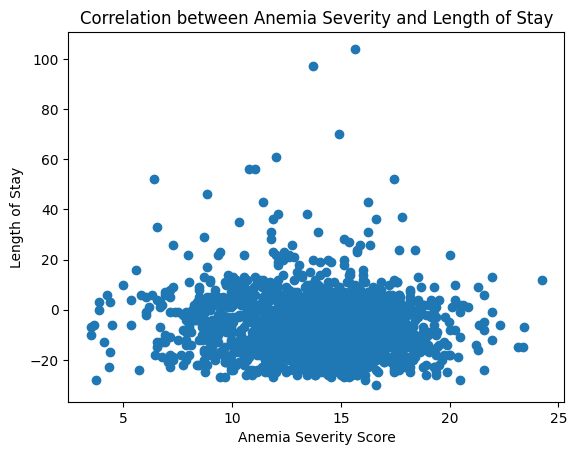

In [83]:
#Below are the columns responsible for causing anemia to cardiac patients.

df9 = pd.read_excel('Cardiac_Outcomes.xlsx',sheet_name='Labs')
df10 = pd.read_excel('Cardiac_Outcomes.xlsx',sheet_name='Hospitalization_Discharge')

# moderate_to_severe_chronic_kidney_disease = df9['moderate_to_severe_chronic_kidney_disease']
# congestive_heart_failure = df9['congestive_heart_failure']
hemoglobin = df9['hemoglobin']
hematocrit = df9['hematocrit']

# As per World Health Organization considering gender-independent cutoff 12 g/dL of hemoglobin per deciliter to 
# identify more patients as being anemic 
# Considering the normal average hematocrit percentage for men and women being 40%

weighted_score = ((df9['hemoglobin'] * 0.12) + (df9['hematocrit'] *.4))
print(weighted_score)

#  Creating a new column to display the severity score of anemia pateints
df9['Anemia_Severity_Score'] = weighted_score
df9['length_of_stay'] = df10['dischargeDay'] - df10['Admission_date'].dt.day
df9['length_of_stay']
plt.scatter(df9['Anemia_Severity_Score'], df9['length_of_stay'])
plt.xlabel('Anemia Severity Score')
plt.ylabel('Length of Stay')
plt.title('Correlation between Anemia Severity and Length of Stay')
plt.show()

#### 25) Using GCS score, how many patients are considered to be in a coma?

In [73]:
patient_coma_count=0
# checking for coma patients with GCS score
for i in df2['GCS']:
    if i<=8:
      patient_coma_count+=1
print("Number Of Patients In Coma Are: ",patient_coma_count)

Number Of Patients In Coma Are:  19


#### 26) Create a column that randomly generates an age between the age group given for each patient. What was the average age of the patients?

In [82]:
import numpy as np
def random_age(age):
    age_range = [int(age) for age in age.split('-')]
    # generating random age using randint()
    return np.random.randint(age_range[0], age_range[1] + 1)
Demography['new_age'] = Demography['ageCat'].apply(random_age)
# calculating average age for the new age column
average_age = Demography['new_age'].mean()
print(f"Average age of the patients: {average_age:.2f}")
Demography

Average age of the patients: 74.43


,inpatient_number,gender,weight,height,BMI,occupation,ageCat,new_age
0,857781,Male,50.0,1.64,18.590125,UrbanResident,69-79,75
1,743087,Female,51.0,1.63,19.195303,UrbanResident,69-79,71
2,866418,Male,70.0,1.70,24.221453,farmer,59-69,60
3,775928,Male,65.0,1.70,22.491349,UrbanResident,69-79,76
4,810128,Female,76.0,1.55,31.633715,UrbanResident,69-79,70
...,...,...,...,...,...,...,...,...
2003,740689,Female,35.0,1.50,15.555556,Others,79-89,86
2004,734280,Female,50.0,1.55,20.811655,UrbanResident,79-89,87
2005,781004,Male,75.0,1.70,25.951557,UrbanResident,39-49,44
2006,744870,Male,40.0,1.50,17.777778,UrbanResident,49-59,55


#### 27) Using the age column generated in Q.26, calculate year of birth for each patient

In [81]:
import datetime
now = datetime.datetime.now()
#generating the current year
current_year = now.year
# finding the year of borned
df5['year_of_birth']=current_year-df5['new_age']
df5

,inpatient_number,gender,weight,height,BMI,occupation,ageCat,new_age,year_of_birth
0,857781,Male,50.0,1.64,18.590125,UrbanResident,69-79,69,1955
1,743087,Female,51.0,1.63,19.195303,UrbanResident,69-79,73,1951
2,866418,Male,70.0,1.70,24.221453,farmer,59-69,62,1962
3,775928,Male,65.0,1.70,22.491349,UrbanResident,69-79,71,1953
4,810128,Female,76.0,1.55,31.633715,UrbanResident,69-79,76,1948
...,...,...,...,...,...,...,...,...,...
2003,740689,Female,35.0,1.50,15.555556,Others,79-89,83,1941
2004,734280,Female,50.0,1.55,20.811655,UrbanResident,79-89,82,1942
2005,781004,Male,75.0,1.70,25.951557,UrbanResident,39-49,40,1984
2006,744870,Male,40.0,1.50,17.777778,UrbanResident,49-59,56,1968


#### 28) Store patient number and gender in a dictionary as a pair of values. Show the first 10 values

In [76]:
# Get the column info
Patient_Num= df5['inpatient_number']
Gender = df5['gender']
result = []
for i in range(len( Patient_Num)):
     #Adding to result based on indexes
     result.append(( Patient_Num[i], Gender[i]))
for j in range(min(10, len(result))):
 print(result[j])

(857781, 'Male')
(743087, 'Female')
(866418, 'Male')
(775928, 'Male')
(810128, 'Female')
(823318, 'Female')
(844094, 'Male')
(787530, 'Female')
(795420, 'Female')
(829801, 'Female')


#### 29) What percentage of those in a coma also have diabetes?

In [77]:
merge_data = df2.merge(df3)
# counting coma patients
coma_count = merge_data[merge_data['GCS'] <= 8].shape[0]
# counting patients with coma and diabetes
coma_diabetes_count = merge_data[(merge_data['diabetes'] == 1) & (merge_data['GCS'] <= 8)].shape[0]
print("coma_diabetes_count: ",coma_diabetes_count)
print("coma_count: ",coma_count)
#finding the percentage of those in coma also have diabetes
if coma_count > 0:
    result = (coma_diabetes_count / coma_count) * 100
    print(f"Percentage of patients in a coma who also have diabetes: {result:.2f}%")
else:
    print("No patients in a coma found in the dataset.")


coma_diabetes_count:  2
coma_count:  19
Percentage of patients in a coma who also have diabetes: 10.53%


#### 30) Identify any columns relating to echocardiography and create a severity score for cardiac function. Compare this outcome and show average severity score for each outcome

In [78]:
# Initialize LVEF_Score column
CardiacComplications['LVEF_Score'] = 0  

# Calculate LVEF_Score for each LVEF value
for i, LVEF in enumerate(CardiacComplications['LVEF']):
    if LVEF >= 55:
        CardiacComplications.at[i, 'LVEF_Score'] = 0
    elif 40 <= LVEF <= 54:
       CardiacComplications.at[i, 'LVEF_Score'] = 1
    elif 30 <= LVEF <= 39:
        CardiacComplications.at[i, 'LVEF_Score'] = 2
    else:
       CardiacComplications.at[i, 'LVEF_Score'] = 3

# Calculate Severity Score
CardiacComplications['Severity_Score'] = CardiacComplications['LVEF_Score'] +CardiacComplications['mitral_valve_EMS'] + CardiacComplications['mitral_valve_AMS'] + CardiacComplications['EA']
# assigning df column to df1
CardiacComplications['outcome_column_name'] = Hospitalization_Discharge['outcome_during_hospitalization']
# finding average scores for each outcome
average_scores = {}
for outcome in CardiacComplications['outcome_column_name'].unique():
    average_scores[outcome] = CardiacComplications[CardiacComplications['outcome_column_name'] == outcome]['Severity_Score'].mean()
# printing the averages for each outcome
print("Average Severity Score for Each Outcome:")
print(average_scores)


Average Severity Score for Each Outcome:
{'Alive': 5.311840871934605, 'Dead': 3.821333333333333, 'DischargeAgainstOrder': 3.6080454545454548}


#### 31) Group the days to re-admission into bins and count how many patients were in each bin

In [79]:
bin = [0, 50, 100, 150, 200,250,300,350,400,450,500]
# bin the readmission_time_days_from_admission column
bin_count = pd.cut(Hospitalization_Discharge['readmission_time_days_from_admission'], bin).value_counts()
print(bin_count)

readmission_time_days_from_admission
(0, 50]       274
(50, 100]     257
(100, 150]    128
(150, 200]     71
(200, 250]     58
(250, 300]     34
(350, 400]     22
(300, 350]     21
(450, 500]      8
(400, 450]      7
Name: count, dtype: int64


#### 32) Combine admission_ward & admission_way and count the patients under the new group. Create a pie chart and explode the biggest wedge

([<matplotlib.patches.Wedge at 0x20e56d1d190>,
 [Text(0.269900580191181, 1.169253469874032, 'Cardiology NonEmergency'),
  Text(-0.8935461674585818, -0.6415413054668265, 'Cardiology Emergency'),
  Text(0.4619319887459488, -0.9983079874333436, 'GeneralWard Emergency'),
  Text(0.8803140870178159, -0.6595810095795583, 'Others NonEmergency'),
  Text(1.0354809225047192, -0.3711862862886717, 'GeneralWard NonEmergency'),
  Text(1.0891131681405644, -0.15437780599173848, 'Others Emergency'),
  Text(1.0996109524378002, -0.029253260994870897, 'ICU Emergency'),
  Text(1.099994615372118, -0.003441823985392837, 'ICU NonEmergency')],
 [Text(0.15744200511152223, 0.6820645240931853, '42.78%'),
  Text(-0.48738881861377187, -0.34993162116372356, '34.26%'),
  Text(0.2519629029523357, -0.5445316295090964, '9.71%'),
  Text(0.48017132019153586, -0.35977145977066816, '6.03%'),
  Text(0.564807775911665, -0.20246524706654817, '3.49%'),
  Text(0.5940617280766715, -0.0842060759954937, '2.99%'),
  Text(0.5997877922

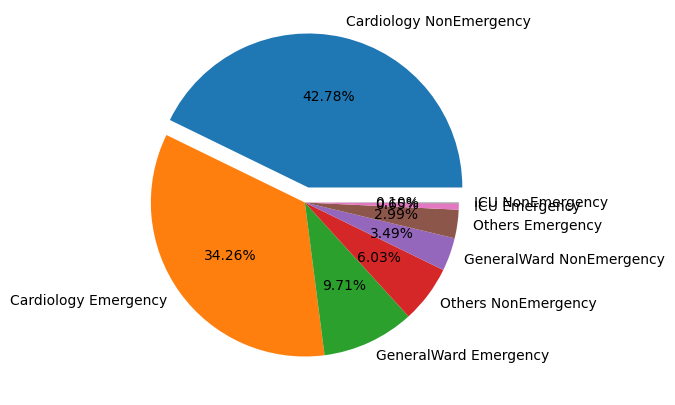

In [80]:
Hospitalization_Discharge['adm_ward_way']=Hospitalization_Discharge['admission_ward']+' '+Hospitalization_Discharge['admission_way']
adm_count=Hospitalization_Discharge['adm_ward_way'].value_counts()
plt.figure(figsize=(5,5))
explodes=[0.1 if count == adm_count.idxmax() else 0 for count in adm_count.index]
# creating pie chart with percentages 
plt.pie(adm_count,labels=adm_count.index,explode=explodes,autopct="%0.2f%%")